In [1]:
# Find python tutorials in https://docs.python.org/3/tutorial/index.html if you need.

import h5py  # h5py package is a Pythonic interface to the HDF5 binary data format. http://docs.h5py.org/en/stable/quick.html.
import numpy  # numPy is the fundamental package for scientific computing with Python. https://docs.scipy.org/doc/numpy-1.16.1/user/quickstart.html.

# Read BJ16_M32x32_T30_InOut.h5.

f1 = h5py.File("BJ16_M32x32_T30_InOut.h5", "r")
print("Subsets in BJ16_M32x32_T30_InOut.h5:")
# List names and shapes of all datasets in the file.
for key in f1.keys():  
    print(key, f1[key].shape)
# the following lines will be shown on the screen:
# data (7220, 2, 32, 32)
# date (7220,)

# Read BJ16_M32x32_T30_InOut.h5.

f2 = h5py.File("BJ_Meteorology.h5", "r")
print("Subsets in BJ16_M32x32_T30_InOut.h5:")
# List names and shapes of all datasets in the file.
for key in f2.keys():  
    print(key, f2[key].shape)
# the following lines will be shown on the screen:
# Temperature (7220,)
# Weather (7220, 17)
# WindSpeed (7220,)
# date (7220,)


# Transform a datasets in a .h5 file into an numpy array.

date = f1["date"][:]
# A array of shape 7220x1 where date[i] is the time of i-th timeslot.

data = f1["data"][:]
# An array of shape 7220x2x32x32 where the first dimension represents the index of timeslots. data[i][0] is a (32, 32) inflow matrix and data[i][1] is a (32, 32) outflow matrix.

temperature = f2["Temperature"][:]
# An array of shape 7220x1 where temperature[i] is the temperature at i-th timeslot.

weather = f2["Weather"][:]
# An array of shape 7220x17 where weather[i] is a one-hot vector which means:
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Sunny
# [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Cloudy
# [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Overcast
# [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Rainy
# [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Sprinkle
# [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ModerateRain
# [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] HeavyRain
# [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] Rainstorm
# [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] Thunderstorm
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] FreezingRain
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] Snowy
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] LightSnow
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] ModerateSnow
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] HeavySnow
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] Foggy
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] Sandstorm
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] Dusty

windspeed = f2["WindSpeed"][:]
# An array of shape 7220x1 where windspeed[i] is the wind speed at i-th timeslot.


f1.close()
f2.close()


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Subsets in BJ16_M32x32_T30_InOut.h5:
data (7220, 2, 32, 32)
date (7220,)
Subsets in BJ16_M32x32_T30_InOut.h5:
Temperature (7220,)
Weather (7220, 17)
WindSpeed (7220,)
date (7220,)


In [2]:
import pandas as pd
import datetime 
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from itertools import chain
from IPython.display import clear_output


In [3]:
datestr=[i.decode('UTF-8') for i in date]
datetimelist=[i[:-2]+" "+ str(int(i[-2:])*30 // 60).zfill(2)+":"+str(int(i[-2:])*30 % 60).zfill(2) for i in datestr]
for i in range(len(datetimelist)):
    if datetimelist[i][-5:] =="24:00":
        datetimelist[i]=datetimelist[i][:-5]+"23:59"
datelist=[datetime.datetime.strptime(i, '%Y%m%d %H:%M')  for i in datetimelist]

In [4]:
t0=time.time()
mylist=[[],[],[],[],[],[],[]]
for x in range(data.shape[2]):
    for y in range(data.shape[3]):
        for i in range(data.shape[0]):
            mylist[0].append(data[i][0][x][y])
            mylist[1].append(data[i][1][x][y])
            mylist[2].append(x)
            mylist[3].append(y)
            mylist[4].append(datelist[i])
            mylist[5].append(temperature[i])
            mylist[6].append(windspeed[i])

premylist=[[],[],[]]
premylist[0]=[mylist[0][i] for i in range(len(mylist[0])-1)]
premylist[1]=[mylist[1][i] for i in range(len(mylist[1])-1)]
premylist[2]=[mylist[4][i] for i in range(len(mylist[4])-1)]

pre2mylist=[[],[],[]]
pre2mylist[0]=[mylist[0][i] for i in range(len(mylist[0])-2)]
pre2mylist[1]=[mylist[1][i] for i in range(len(mylist[1])-2)]
pre2mylist[2]=[mylist[4][i] for i in range(len(mylist[4])-2)]

pre3mylist=[[],[],[]]
pre3mylist[0]=[mylist[0][i] for i in range(len(mylist[0])-3)]
pre3mylist[1]=[mylist[1][i] for i in range(len(mylist[1])-3)]
pre3mylist[2]=[mylist[4][i] for i in range(len(mylist[4])-3)]

pre4mylist=[[],[],[]]
pre4mylist[0]=[mylist[0][i] for i in range(len(mylist[0])-4)]
pre4mylist[1]=[mylist[1][i] for i in range(len(mylist[1])-4)]
pre4mylist[2]=[mylist[4][i] for i in range(len(mylist[4])-4)]

t1=time.time()
print("The list loadin time %f"%(t1-t0))

for i in range(len(mylist)):
    mylist[i].pop(0)
    mylist[i].pop(0)
    mylist[i].pop(0)
    mylist[i].pop(0)

for i in range(len(premylist)):
    premylist[i].pop(0)
    premylist[i].pop(0)
    premylist[i].pop(0)

    
for i in range(len(pre2mylist)):
    pre2mylist[i].pop(0)
    pre2mylist[i].pop(0)        
    
for i in range(len(pre3mylist)):
    pre3mylist[i].pop(0)    

d={"Timeslot":mylist[4],
   "Timeslot_Pre":premylist[2],
   "Timeslot_Pre2":pre2mylist[2],
   "Timeslot_Pre3":pre3mylist[2],
   "Timeslot_Pre4":pre4mylist[2],
   "Region_x":mylist[2],
   "Region_y":mylist[3],
   "Inflow":mylist[0],
   "Outflow":mylist[1],
   "PreInflow":premylist[0],
   "PreOutflow":premylist[1],
   "Pre2Inflow":pre2mylist[0],
   "Pre2Outflow":pre2mylist[1],
   "Pre3Inflow":pre3mylist[0],
   "Pre3Outflow":pre3mylist[1],
   "Pre4Inflow":pre4mylist[0],
   "Pre4Outflow":pre4mylist[1],
   "Temperature":mylist[5],
   "Windspeed":mylist[6]
   
    
}
df = pd.DataFrame(data=d)
df=df[:][(df["Timeslot"]-df["Timeslot_Pre"] =="00:30:00") | (df["Timeslot"]-df["Timeslot_Pre"] =="00:29:00")&
         (df["Timeslot_Pre"]-df["Timeslot_Pre2"] =="00:30:00") | (df["Timeslot_Pre"]-df["Timeslot_Pre2"] =="00:29:00")&
         (df["Timeslot_Pre2"]-df["Timeslot_Pre3"] =="00:30:00") | (df["Timeslot_Pre2"]-df["Timeslot_Pre3"] =="00:29:00")&
         (df["Timeslot_Pre3"]-df["Timeslot_Pre4"] =="00:30:00") | (df["Timeslot_Pre3"]-df["Timeslot_Pre4"] =="00:29:00")]

df=df.drop(columns=["Timeslot_Pre"])
df=df.drop(columns=["Timeslot_Pre2"])

df.to_csv("Featured_Data.csv",index=False)

t2=time.time()
print("The DF loadin time %f"%(t2-t1))
print("The Total loadin time %f"%(t2-t0))

The list loadin time 50.389134
The DF loadin time 288.957189
The Total loadin time 339.346323


In [5]:
# df=pd.read_csv('Featured_Data.csv')

In [6]:
n=100
xr=5
yr=5

unsplit_df=df[:][(df["Region_x"]==xr)&(df["Region_y"]==yr)]
test_df=unsplit_df[n:]
train_df=unsplit_df[:n]
results_in = sm.OLS(train_df["Inflow"],train_df[["PreInflow","PreOutflow"]]).fit()
results_out = sm.OLS(train_df["Outflow"],train_df[["PreInflow","PreOutflow"]]).fit()


print("Shape: ",test_df.shape[0],train_df.shape[0])
MSE_in =((test_df["Inflow"]-results_in.predict(test_df[["PreInflow","PreOutflow"]]))**2).sum()/test_df.shape[0]
MSE_out=((test_df["Outflow"]-results_out.predict(test_df[["PreInflow","PreOutflow"]]))**2).sum()/test_df.shape[0]
print("\nInflow  model MSE =",MSE_in )
print("\nOutflow model MSE =",MSE_out)

Shape:  7094 100

Inflow  model MSE = 171.72601316414875

Outflow model MSE = 171.90477842453896


                            OLS Regression Results                            
Dep. Variable:                 Inflow   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1001.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           6.08e-66
Time:                        01:10:05   Log-Likelihood:                -404.26
No. Observations:                 100   AIC:                             812.5
Df Residuals:                      98   BIC:                             817.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PreInflow      1.1505      0.759      1.517      0.1

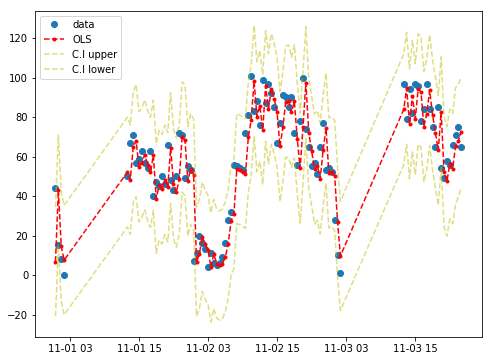

In [7]:
y_fitted = results_in.fittedvalues
print(results_in.summary())
print("\n===============================================================================\n")
predictions = results_in.get_prediction(train_df[["PreInflow","PreOutflow"]])
print(predictions.summary_frame(alpha=0.05).head())
print("\n===============================================================================\n")
print("Top 10 fitted predict")
print(y_fitted.head(10))
print("\n===============================================================================\n")
prstd, iv_l, iv_u = wls_prediction_std(results_in)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(train_df["Timeslot"],train_df["Inflow"] , 'o', label='data')
ax.plot(train_df["Timeslot"], y_fitted, 'r--.',label='OLS')
ax.plot(train_df["Timeslot"], iv_u, 'y--', label="C.I upper", alpha = 0.5)
ax.plot(train_df["Timeslot"], iv_l, 'y--', label="C.I lower", alpha = 0.5)
ax.legend(loc='best')

# Whole 32*32 Region With Diff approach

In [8]:
nrate=0.2

## "PreInflow","PreOutflow"

In [9]:
whole_error_in =[]
whole_error_out=[]
MSE_in =[]
MSE_out=[]
t0=time.time()
for xr in range(32):
    t1=time.time()
    for yr in range(32):
        
        t2=time.time()
        
        unsplit_df=df[:][(df["Region_x"]==xr)&(df["Region_y"]==yr)]
        n=int(unsplit_df.shape[0]*nrate)
        train_df=unsplit_df.sample(n,random_state=2019)
        test_df=unsplit_df.drop(unsplit_df.sample(n,random_state=2019).index)
        results_in = sm.OLS(train_df["Inflow"],train_df[["PreInflow","PreOutflow"]]).fit()
        results_out = sm.OLS(train_df["Outflow"],train_df[["PreInflow","PreOutflow"]]).fit()
        
        
        whole_error_in.append(test_df["Inflow"]-results_in.predict(test_df[["PreInflow","PreOutflow"]]))
        whole_error_out.append(test_df["Outflow"]-results_out.predict(test_df[["PreInflow","PreOutflow"]]))
        
        MSE_in.append(((test_df["Inflow"]-results_in.predict(test_df[["PreInflow","PreOutflow"]]))**2).sum()/test_df.shape[0])
        MSE_out.append(((test_df["Outflow"]-results_out.predict(test_df[["PreInflow","PreOutflow"]]))**2).sum()/test_df.shape[0])
        
        
        t3=time.time()
        print("Finished (%i,%i)region models of Region at %0.3f seconds"%(xr,yr,(t3-t2)))     
    clear_output()    
    t4=time.time()
    print("Finished %i th row of Region at %0.3f seconds"%(xr,t4-t1))

t5=time.time()
clear_output()
print("Finished Whole 32 x 32 region model at %0.5f seconds"%(t5-t0))

d_1=({ 
      "Region_x":[i for i in range(32) for j in range(32)],
      "Region_y":[j for i in range(32) for j in range(32)],
      "Inflow_MSE":MSE_in,
      "Outflow_MSE":MSE_out,
    
}
)
csvdf=pd.DataFrame(data=d_1)
csvdf.to_csv("OneTimeslot.csv",index=False)


a1 = [j**2 for i in whole_error_in for j in i]
a2 = [j**2 for i in whole_error_out for j in i]
MSE_test_in=sum(a1)/len(a1)
MSE_test_out=sum(a2)/len(a2)
print("MSE of inflow  =%f\n"%(MSE_test_in))
print("MSE of outflow =%f\n"%(MSE_test_out))

Finished Whole 32 x 32 region model at 147.87618 seconds
MSE of inflow  =599.332213

MSE of outflow =599.104774



## "PreInflow"+"PreOutflow","Temperature","Windspeed"

In [10]:
whole_error_in =[]
whole_error_out=[]
MSE_in =[]
MSE_out=[]
t0=time.time()
for xr in range(32):
    t1=time.time()
    for yr in range(32):
        
        t2=time.time()
        
        unsplit_df=df[:][(df["Region_x"]==xr)&(df["Region_y"]==yr)]
        n=int(unsplit_df.shape[0]*nrate)
        train_df=unsplit_df.sample(n,random_state=2019)
        test_df=unsplit_df.drop(unsplit_df.sample(n,random_state=2019).index)
        results_in = sm.OLS(train_df["Inflow"],train_df[["PreInflow","PreOutflow","Temperature","Windspeed"]]).fit()
        results_out = sm.OLS(train_df["Outflow"],train_df[["PreInflow","PreOutflow","Temperature","Windspeed"]]).fit()
        
        
        whole_error_in.append(test_df["Inflow"]-results_in.predict(test_df[["PreInflow","PreOutflow","Temperature","Windspeed"]]))
        whole_error_out.append(test_df["Outflow"]-results_out.predict(test_df[["PreInflow","PreOutflow","Temperature","Windspeed"]]))

        MSE_in.append(((test_df["Inflow"]-results_in.predict(test_df[["PreInflow","PreOutflow","Temperature","Windspeed"]]))**2).sum()/test_df.shape[0])
        MSE_out.append(((test_df["Outflow"]-results_out.predict(test_df[["PreInflow","PreOutflow","Temperature","Windspeed"]]))**2).sum()/test_df.shape[0])
        t3=time.time()
        print("Finished (%i,%i)region models of Region at %0.3f seconds"%(xr,yr,(t3-t2)))     
    clear_output()    
    t4=time.time()
    print("Finished %i th row of Region at %0.3f seconds"%(xr,t4-t1))

t5=time.time()
clear_output()
print("Finished Whole 32 x 32 region model at %0.5f seconds"%(t5-t0))

d_1=({ 
      "Region_x":[i for i in range(32) for j in range(32)],
      "Region_y":[j for i in range(32) for j in range(32)],
      "Inflow_MSE":MSE_in,
      "Outflow_MSE":MSE_out,
    
}
)
csvdf=pd.DataFrame(data=d_1)
csvdf.to_csv("OneTimeslot_Weather.csv",index=False)

a1 = [j**2 for i in whole_error_in for j in i]
a2 = [j**2 for i in whole_error_out for j in i]
MSE_test_in=sum(a1)/len(a1)
MSE_test_out=sum(a2)/len(a2)
print("MSE of inflow  =%f\n"%(MSE_test_in))
print("MSE of outflow =%f\n"%(MSE_test_out))

Finished Whole 32 x 32 region model at 148.43150 seconds
MSE of inflow  =596.659418

MSE of outflow =596.530445



# "Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"

In [11]:
whole_error_in =[]
whole_error_out=[]
MSE_in =[]
MSE_out=[]
t0=time.time()
for xr in range(32):
    t1=time.time()
    for yr in range(32):
        
        t2=time.time()
        unsplit_df=df[:][(df["Region_x"]==xr)&(df["Region_y"]==yr)]
        n=int(unsplit_df.shape[0]*nrate)
        train_df=unsplit_df.sample(n,random_state=2019)
        test_df=unsplit_df.drop(unsplit_df.sample(n,random_state=2019).index)
        results_in = sm.OLS(train_df["Inflow"],train_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]).fit()
        results_out = sm.OLS(train_df["Outflow"],train_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]).fit()
        
        
        whole_error_in.append(test_df["Inflow"]-results_in.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]))
        whole_error_out.append(test_df["Outflow"]-results_out.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]))

        MSE_in.append(((test_df["Inflow"]-results_in.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]))**2).sum()/test_df.shape[0])
        MSE_out.append(((test_df["Outflow"]-results_out.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]))**2).sum()/test_df.shape[0])
        t3=time.time()
        print("Finished (%i,%i)region models of Region at %0.3f seconds"%(xr,yr,(t3-t2)))     
    clear_output()    
    t4=time.time()
    print("Finished %i th row of Region at %0.3f seconds"%(xr,t4-t1))

t5=time.time()
clear_output()
print("Finished Whole 32 x 32 region model at %0.5f seconds"%(t5-t0))
      
d_1=({ 
      "Region_x":[i for i in range(32) for j in range(32)],
      "Region_y":[j for i in range(32) for j in range(32)],
      "Inflow_MSE":MSE_in,
      "Outflow_MSE":MSE_out,
    
}
)
csvdf=pd.DataFrame(data=d_1)
csvdf.to_csv("TwoTimeslotWeather.csv",index=False)
    
a1 = [j**2 for i in whole_error_in for j in i]
a2 = [j**2 for i in whole_error_out for j in i]
MSE_test_in=sum(a1)/len(a1)
MSE_test_out=sum(a2)/len(a2)
print("MSE of inflow  =%f\n"%(MSE_test_in))
print("MSE of outflow =%f\n"%(MSE_test_out))

Finished Whole 32 x 32 region model at 147.39696 seconds
MSE of inflow  =591.009515

MSE of outflow =590.830131



##  "Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow"

In [12]:
whole_error_in =[]
whole_error_out=[]
MSE_in =[]
MSE_out=[]
t0=time.time()
for xr in range(32):
    t1=time.time()
    for yr in range(32):
        
        t2=time.time()
        unsplit_df=df[:][(df["Region_x"]==xr)&(df["Region_y"]==yr)]
        n=int(unsplit_df.shape[0]*nrate)
        train_df=unsplit_df.sample(n,random_state=2019)
        test_df=unsplit_df.drop(unsplit_df.sample(n,random_state=2019).index)
        results_in = sm.OLS(train_df["Inflow"],train_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow"]]).fit()
        results_out = sm.OLS(train_df["Outflow"],train_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow"]]).fit()
        
        
        whole_error_in.append(test_df["Inflow"]-results_in.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow"]]))
        whole_error_out.append(test_df["Outflow"]-results_out.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow"]]))

        MSE_in.append(((test_df["Inflow"]-results_in.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow"]]))**2).sum()/test_df.shape[0])
        MSE_out.append(((test_df["Outflow"]-results_out.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow"]]))**2).sum()/test_df.shape[0])
        t3=time.time()
        print("Finished (%i,%i)region models of Region at %0.3f seconds"%(xr,yr,(t3-t2)))     
    clear_output()    
    t4=time.time()
    print("Finished %i th row of Region at %0.3f seconds"%(xr,t4-t1))

t5=time.time()
clear_output()
print("Finished Whole 32 x 32 region model at %0.5f seconds"%(t5-t0))

d_1=({ 
      "Region_x":[i for i in range(32) for j in range(32)],
      "Region_y":[j for i in range(32) for j in range(32)],
      "Inflow_MSE":MSE_in,
      "Outflow_MSE":MSE_out,
    
}
)
csvdf=pd.DataFrame(data=d_1)
csvdf.to_csv("TwoTimeslot.csv",index=False)

a1 = [j**2 for i in whole_error_in for j in i]
a2 = [j**2 for i in whole_error_out for j in i]
MSE_test_in=sum(a1)/len(a1)
MSE_test_out=sum(a2)/len(a2)
print("MSE of inflow  =%f\n"%(MSE_test_in))
print("MSE of outflow =%f\n"%(MSE_test_out))

Finished Whole 32 x 32 region model at 143.44056 seconds
MSE of inflow  =593.637916

MSE of outflow =593.387076



# "Pre3Inflow","Pre3Outflow"+"Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed" 

In [13]:
whole_error_in =[]
whole_error_out=[]
MSE_in =[]
MSE_out=[]
t0=time.time()
for xr in range(32):
    t1=time.time()
    for yr in range(32):
        
        t2=time.time()
        unsplit_df=df[:][(df["Region_x"]==xr)&(df["Region_y"]==yr)]
        n=int(unsplit_df.shape[0]*nrate)
        train_df=unsplit_df.sample(n,random_state=2019)
        test_df=unsplit_df.drop(unsplit_df.sample(n,random_state=2019).index)
        results_in = sm.OLS(train_df["Inflow"],train_df[["Pre3Inflow","Pre3Outflow","Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]).fit()
        results_out = sm.OLS(train_df["Outflow"],train_df[["Pre3Inflow","Pre3Outflow","Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]).fit()
        
        
        tempin = results_in.predict(test_df[["Pre3Inflow","Pre3Outflow","Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]])
        tempout=results_out.predict(test_df[["Pre3Inflow","Pre3Outflow","Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]])                   
        
        whole_error_in.append(test_df["Inflow"]-tempin)
        whole_error_out.append(test_df["Outflow"]-tempout)

        MSE_in.append(((test_df["Inflow"]-tempin)**2).sum()/test_df.shape[0])
        MSE_out.append(((test_df["Outflow"]-tempout)**2).sum()/test_df.shape[0])
        t3=time.time()
        print("Finished (%i,%i)region models of Region at %0.3f seconds"%(xr,yr,(t3-t2)))     
    clear_output()    
    t4=time.time()
    print("Finished %i th row of Region at %0.3f seconds"%(xr,t4-t1))

t5=time.time()
clear_output()
print("Finished Whole 32 x 32 region model at %0.5f seconds"%(t5-t0))
      
d_1=({ 
      "Region_x":[i for i in range(32) for j in range(32)],
      "Region_y":[j for i in range(32) for j in range(32)],
      "Inflow_MSE":MSE_in,
      "Outflow_MSE":MSE_out,
    
}
)
csvdf=pd.DataFrame(data=d_1)
csvdf.to_csv("ThreeTimeslotWeather.csv",index=False)
    
a1 = [j**2 for i in whole_error_in for j in i]
a2 = [j**2 for i in whole_error_out for j in i]
MSE_test_in=sum(a1)/len(a1)
MSE_test_out=sum(a2)/len(a2)
print("MSE of inflow  =%f\n"%(MSE_test_in))
print("MSE of outflow =%f\n"%(MSE_test_out))

Finished Whole 32 x 32 region model at 148.00006 seconds
MSE of inflow  =588.605149

MSE of outflow =588.465241



# "Pre4Inflow","Pre4Outflow"+"Pre3Inflow","Pre3Outflow"+"Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"

In [14]:
whole_error_in =[]
whole_error_out=[]
MSE_in =[]
MSE_out=[]
t0=time.time()
for xr in range(32):
    t1=time.time()
    for yr in range(32):
        
        t2=time.time()
        unsplit_df=df[:][(df["Region_x"]==xr)&(df["Region_y"]==yr)]
        n=int(unsplit_df.shape[0]*nrate)
        train_df=unsplit_df.sample(n,random_state=2019)
        test_df=unsplit_df.drop(unsplit_df.sample(n,random_state=2019).index)
        results_in = sm.OLS(train_df["Inflow"],train_df[["Pre4Inflow","Pre4Outflow","Pre3Inflow","Pre3Outflow","Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]).fit()
        results_out = sm.OLS(train_df["Outflow"],train_df[["Pre4Inflow","Pre4Outflow","Pre3Inflow","Pre3Outflow","Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]).fit()
        
        tempin = results_in.predict(test_df[["Pre4Inflow","Pre4Outflow","Pre3Inflow","Pre3Outflow","Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]])
        tempout=results_out.predict(test_df[["Pre4Inflow","Pre4Outflow","Pre3Inflow","Pre3Outflow","Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]])                   
        
        whole_error_in.append(test_df["Inflow"]-tempin)
        whole_error_out.append(test_df["Outflow"]-tempout)

        MSE_in.append(((test_df["Inflow"]-tempin)**2).sum()/test_df.shape[0])
        MSE_out.append(((test_df["Outflow"]-tempout)**2).sum()/test_df.shape[0])
        t3=time.time()
        print("Finished (%i,%i)region models of Region at %0.3f seconds"%(xr,yr,(t3-t2)))     
    clear_output()    
    t4=time.time()
    print("Finished %i th row of Region at %0.3f seconds"%(xr,t4-t1))

t5=time.time()
clear_output()
print("Finished Whole 32 x 32 region model at %0.5f seconds"%(t5-t0))
      
d_1=({ 
      "Region_x":[i for i in range(32) for j in range(32)],
      "Region_y":[j for i in range(32) for j in range(32)],
      "Inflow_MSE":MSE_in,
      "Outflow_MSE":MSE_out,
    
}
)
csvdf=pd.DataFrame(data=d_1)
csvdf.to_csv("FourTimeslotWeather.csv",index=False)
    
a1 = [j**2 for i in whole_error_in for j in i]
a2 = [j**2 for i in whole_error_out for j in i]
MSE_test_in=sum(a1)/len(a1)
MSE_test_out=sum(a2)/len(a2)
print("MSE of inflow  =%f\n"%(MSE_test_in))
print("MSE of outflow =%f\n"%(MSE_test_out))

Finished Whole 32 x 32 region model at 145.89964 seconds
MSE of inflow  =585.877081

MSE of outflow =585.772891



# Logisitc Regression

In [15]:
# from sklearn.linear_model import LogisticRegression

# whole_error_in =[]
# whole_error_out=[]
# MSE_in =[]
# MSE_out=[]
# t0=time.time()
# for xr in range(32):
#     t1=time.time()
#     for yr in range(32):
        
#         t2=time.time()
#         unsplit_df=df[:][(df["Region_x"]==xr)&(df["Region_y"]==yr)]
#         n=int(unsplit_df.shape[0]*nrate)
#         train_df=unsplit_df.sample(n,random_state=2019)
#         test_df=unsplit_df.drop(unsplit_df.sample(n,random_state=2019).index)
#         results_in = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(train_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]],train_df["Inflow"] )
#         results_out =  LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(train_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]],train_df["Outflow"] )
        
        
#         whole_error_in.append(test_df["Inflow"]-results_in.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]))
#         whole_error_out.append(test_df["Outflow"]-results_out.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]))

#         MSE_in.append(((test_df["Inflow"]-results_in.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]))**2).sum()/test_df.shape[0])
#         MSE_out.append(((test_df["Outflow"]-results_out.predict(test_df[["Pre2Inflow","Pre2Outflow","PreInflow","PreOutflow","Temperature","Windspeed"]]))**2).sum()/test_df.shape[0])
#         t3=time.time()
#         print("Finished (%i,%i)Log region models of Region at %0.3f seconds"%(xr,yr,(t3-t2)))     
#     clear_output()    
#     t4=time.time()
#     print("Finished %i th row of Region at %0.3f seconds"%(xr,t4-t1))

# t5=time.time()
# clear_output()
# print("Finished Whole 32 x 32 region model at %0.5f seconds"%(t5-t0))
        
# a1 = [j**2 for i in whole_error_in for j in i]
# a2 = [j**2 for i in whole_error_out for j in i]
# MSE_test_in=sum(a1)/len(a1)
# MSE_test_out=sum(a2)/len(a2)
# print("MSE of inflow  =%f\n"%(MSE_test_in))
# print("MSE of outflow =%f\n"%(MSE_test_out))


